In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
crimes=pd.read_csv("C:\\Users\\My Pc\\Desktop\\Chicago_Crimes_2012_to_2017.csv")

In [4]:
csv_files=["C:\\Users\\My Pc\\Desktop\\Chicago_Crimes_2012_to_2017.csv"]

In [5]:
frames = []
for csv in csv_files:
    df = pd.read_csv(csv ,usecols = ['Date','Primary Type','Location Description','District','Community Area','Arrest'])
    frames.append(df)
    
crime = pd.concat(frames)   
crime.head()

,Date,Primary Type,Location Description,Arrest,District,Community Area
0,05/03/2016 11:40:00 PM,BATTERY,APARTMENT,True,10.0,29.0
1,05/03/2016 09:40:00 PM,BATTERY,RESIDENCE,False,3.0,42.0
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,STREET,False,15.0,25.0
3,05/03/2016 10:10:00 PM,BATTERY,SIDEWALK,False,15.0,25.0
4,05/03/2016 10:00:00 PM,THEFT,RESIDENCE,False,15.0,25.0


In [6]:
print("Are There Missing Data? :",crime.isnull().any().any())     
print(crime.isnull().sum())

Are There Missing Data? : True
Date                       0
Primary Type               0
Location Description    1658
Arrest                     0
District                   1
Community Area            40
dtype: int64


In [7]:
crime.shape

(1456714, 6)

In [8]:
dfcrime = crime.dropna()
dfcrime.shape

(1455015, 6)

In [9]:
count_data_origin = crime['Date'].count()
count_data_modify = dfcrime['Date'].count()
Value = (count_data_modify/count_data_origin)*100
print('The analysis will be carried on with:',"%.2f" % Value,'% of the total data')

The analysis will be carried on with: 99.88 % of the total data


In [10]:
dfcrime.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455015 entries, 0 to 1456713
Data columns (total 6 columns):
Date                    1455015 non-null object
Primary Type            1455015 non-null object
Location Description    1455015 non-null object
Arrest                  1455015 non-null bool
District                1455015 non-null float64
Community Area          1455015 non-null float64
dtypes: bool(1), float64(2), object(3)
memory usage: 68.0+ MB


In [11]:
dfcrime.columns=[each.replace(" ","_") for each in dfcrime.columns]
dfcrime.columns

Index(['Date', 'Primary_Type', 'Location_Description', 'Arrest', 'District',
       'Community_Area'],
      dtype='object')

In [12]:
dfcrime.District.unique()

array([10.,  3., 15.,  6.,  1.,  2., 24.,  7., 18., 12., 14.,  8., 22.,
       19., 16.,  9., 25.,  5., 17.,  4., 11., 20., 13., 31.])

In [14]:
dfcrime['District'] = dfcrime['District'].astype(float).astype(int)
dfcrime.District.unique()

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([10,  3, 15,  6,  1,  2, 24,  7, 18, 12, 14,  8, 22, 19, 16,  9, 25,
        5, 17,  4, 11, 20, 13, 31], dtype=int64)

In [15]:
dfcrime.Community_Area.unique()

array([29., 42., 25., 44., 35., 38.,  1., 67., 43.,  8., 28., 24., 66.,
       40., 73., 39., 41.,  7., 10., 34., 58., 71., 32., 23.,  6., 77.,
       49., 61., 21., 54., 56., 46., 19., 60., 68., 59., 22., 26., 45.,
       30., 11., 69., 31.,  3., 15.,  2., 63., 36., 75., 65., 17., 13.,
       33., 14., 27., 16., 47., 37., 53.,  9., 51., 50., 76., 62.,  4.,
       57., 52., 70., 48., 18., 20.,  5., 64., 12., 74., 55., 72.,  0.])

In [16]:
dfcrime['Community_Area'] = dfcrime['Community_Area'].astype(float).astype(int)
dfcrime['Community_Area'].unique()

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([29, 42, 25, 44, 35, 38,  1, 67, 43,  8, 28, 24, 66, 40, 73, 39, 41,
        7, 10, 34, 58, 71, 32, 23,  6, 77, 49, 61, 21, 54, 56, 46, 19, 60,
       68, 59, 22, 26, 45, 30, 11, 69, 31,  3, 15,  2, 63, 36, 75, 65, 17,
       13, 33, 14, 27, 16, 47, 37, 53,  9, 51, 50, 76, 62,  4, 57, 52, 70,
       48, 18, 20,  5, 64, 12, 74, 55, 72,  0], dtype=int64)

In [17]:
dfcrime.Primary_Type.unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [18]:
dfcrime['Primary_Type'] = dfcrime['Primary_Type'].replace(['NON - CRIMINAL',
                                                           'NON-CRIMINAL (SUBJECT SPECIFIED)'], 
                                                          'NON-CRIMINAL')
dfcrime.Primary_Type.unique()

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

In [19]:
dfcrime.Location_Description.unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE',
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY',
       'NURSING HOME/RETIREMENT HOME', 'ATM (AUTOMATIC TELLER MACHINE)',
       'COMMERCIAL / BUSINESS OFFICE', 'ALLEY', 'VACANT LOT/LAND',
       'GAS STATION', 'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL',
       'LIBRARY', 'TAXICAB', 'SCHOOL, PRIVATE, GROUNDS',
       'HIGHWAY/EXPRESSWAY', 'CONVENIENCE STORE', 'TAVERN/LIQUOR ST

In [20]:


dfcrime['Location_Description'].value_counts().head()



STREET       330464
RESIDENCE    233523
APARTMENT    185022
SIDEWALK     160888
OTHER         55772
Name: Location_Description, dtype: int64

In [21]:
dfcrime.Arrest.unique()

array([ True, False])

In [22]:
dfcrime.Arrest.value_counts()

False    1077554
True      377461
Name: Arrest, dtype: int64

In [23]:
dfcrime.Arrest = dfcrime.Arrest.astype('bool')
dfcrime.Arrest.unique()

C:\Users\My Pc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([ True, False])

In [24]:
dfcrime['date'] = dfcrime['Date'].str[:11]
dfcrime['time'] = dfcrime['Date'].str[12:]

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
dfcrime['date'] = pd.to_datetime(dfcrime['date'])
dfcrime['time'] = pd.to_datetime(dfcrime['time'])

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
dfcrime.index = dfcrime.date
del dfcrime['Date']
del dfcrime['date']
dfcrime.head(2)

,Primary_Type,Location_Description,Arrest,District,Community_Area,time
date,,,,,,
2016-05-03,BATTERY,APARTMENT,True,10,29,2019-05-07 13:40:00
2016-05-03,BATTERY,RESIDENCE,False,3,42,2019-05-07 21:40:00


In [28]:
crime_year = dfcrime.resample('Y').count()
crime_year = pd.DataFrame(crime_year.iloc[:,0])
crime_year.columns = ['Total_crime_per_year']
print(crime_year.head())
print(crime_year.tail())

            Total_crime_per_year
date                            
2012-12-31                335302
2013-12-31                306623
2014-12-31                274344
2015-12-31                262738
2016-12-31                264679
            Total_crime_per_year
date                            
2013-12-31                306623
2014-12-31                274344
2015-12-31                262738
2016-12-31                264679
2017-12-31                 11329


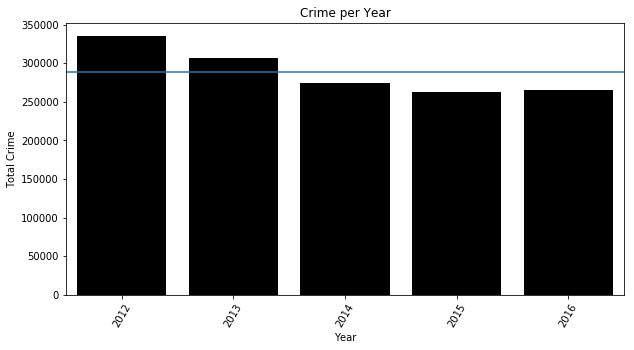

In [29]:
crime_year = crime_year['2012' : '2016']

a = crime_year.index
b = np.arange(2012,2017)

grid = sns.barplot(x = a ,y = 'Total_crime_per_year', data = crime_year, color = 'black')

grid.set_xticklabels(b, rotation = 60)
plt.ylabel('Total Crime')
plt.xlabel('Year')
plt.title('Crime per Year')
plt.axhline(crime_year['Total_crime_per_year'].mean())
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

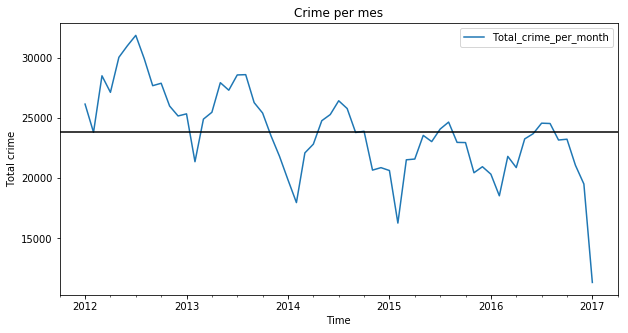

In [30]:
crime_month = dfcrime.resample('M').count()
crime_month = pd.DataFrame(crime_month.iloc[:,0])
crime_month.columns = ['Total_crime_per_month']

crime_month.plot()
plt.xlabel('Time')
plt.ylabel('Total crime')
plt.title('Crime per mes')
plt.axhline(crime_month['Total_crime_per_month'].mean(), color = 'black')
fig=plt.gcf()
fig.set_size_inches(10,5)

In [35]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [5]:
df = crimes.dropna()

In [6]:
df = df.sample(n=100000)

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 927990 to 1041509
Data columns (total 20 columns):
Date                    100000 non-null object
Block                   100000 non-null object
IUCR                    100000 non-null object
Primary Type            100000 non-null object
Description             100000 non-null object
Location Description    100000 non-null object
Arrest                  100000 non-null bool
Domestic                100000 non-null bool
Beat                    100000 non-null int64
District                100000 non-null float64
Ward                    100000 non-null float64
Community Area          100000 non-null float64
FBI Code                100000 non-null object
X Coordinate            100000 non-null float64
Y Coordinate            100000 non-null float64
Year                    100000 non-null int64
Updated On              100000 non-null object
Latitude                100000 non-null float64
Longitude               100000 non-nu

In [8]:
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
927990,014XX S PEORIA ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1232,12.0,25.0,...,1893490.0,2014,41.863218,-87.648867,"(41.863218247, -87.64886723)",10,15,6,33,0
491076,076XX S LUELLA AVE,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESIDENCE,False,False,414,4.0,7.0,...,1854687.0,2013,41.756235,-87.569980,"(41.756235005, -87.569979559)",4,15,12,30,0
1128578,018XX S PULASKI RD,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,1012,10.0,24.0,...,1890745.0,2015,41.856113,-87.724883,"(41.856113138, -87.72488284)",9,26,13,15,0
994277,002XX S CICERO AVE,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,True,False,1533,15.0,28.0,...,1898423.0,2015,41.877289,-87.745160,"(41.877289171, -87.745160395)",4,1,2,40,0
748906,016XX W 81ST ST,051A,ASSAULT,AGGRAVATED: HANDGUN,SIDEWALK,False,False,611,6.0,21.0,...,1851003.0,2014,41.746709,-87.663690,"(41.746709384, -87.663690405)",2,27,17,0,0


In [9]:
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [10]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


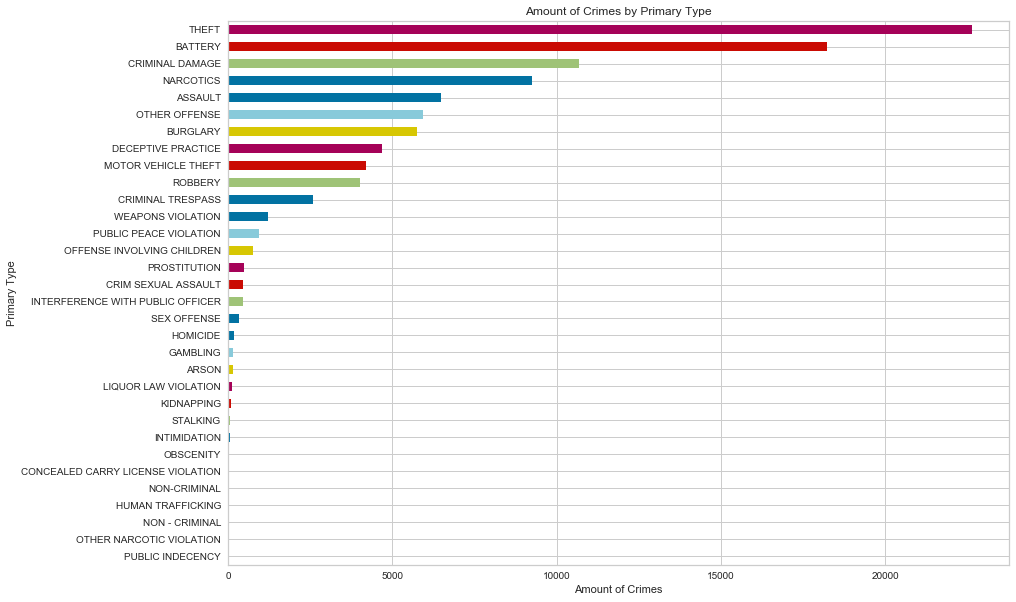

In [11]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()



In [12]:
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
9,GAMBLING,155
0,ARSON,151
15,LIQUOR LAW VIOLATION,129
14,KIDNAPPING,77
29,STALKING,63
13,INTIMIDATION,49
20,OBSCENITY,18
4,CONCEALED CARRY LICENSE VIOLATION,9
19,NON-CRIMINAL,6
18,NON - CRIMINAL,2


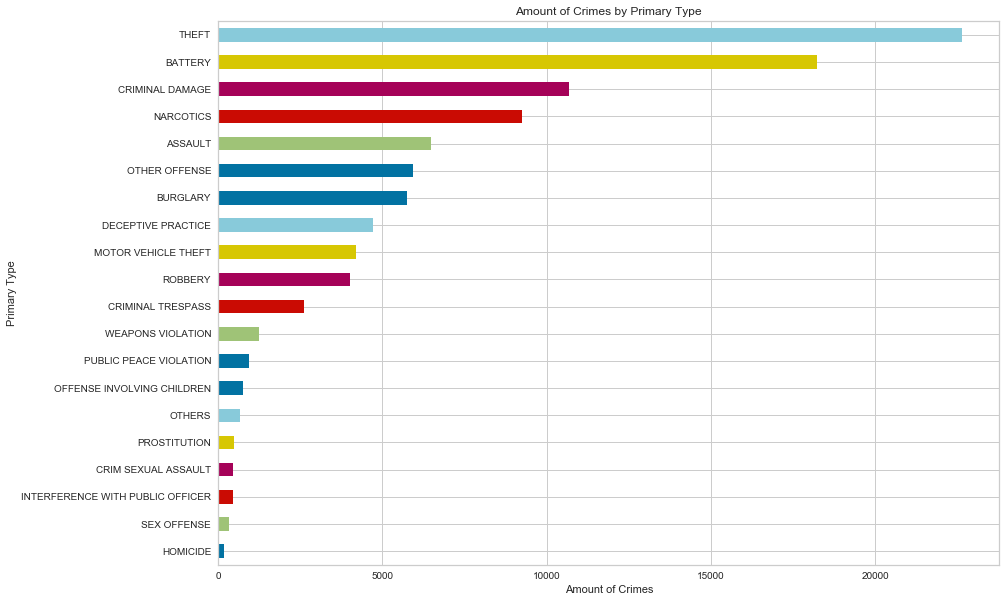

In [13]:
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [14]:
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHERS',
       'CRIMINAL TRESPASS', 'BATTERY', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'NARCOTICS',
       'OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'WEAPONS VIOLATION',
       'HOMICIDE', 'CRIM SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'PROSTITUTION'],
      dtype=object)

In [15]:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

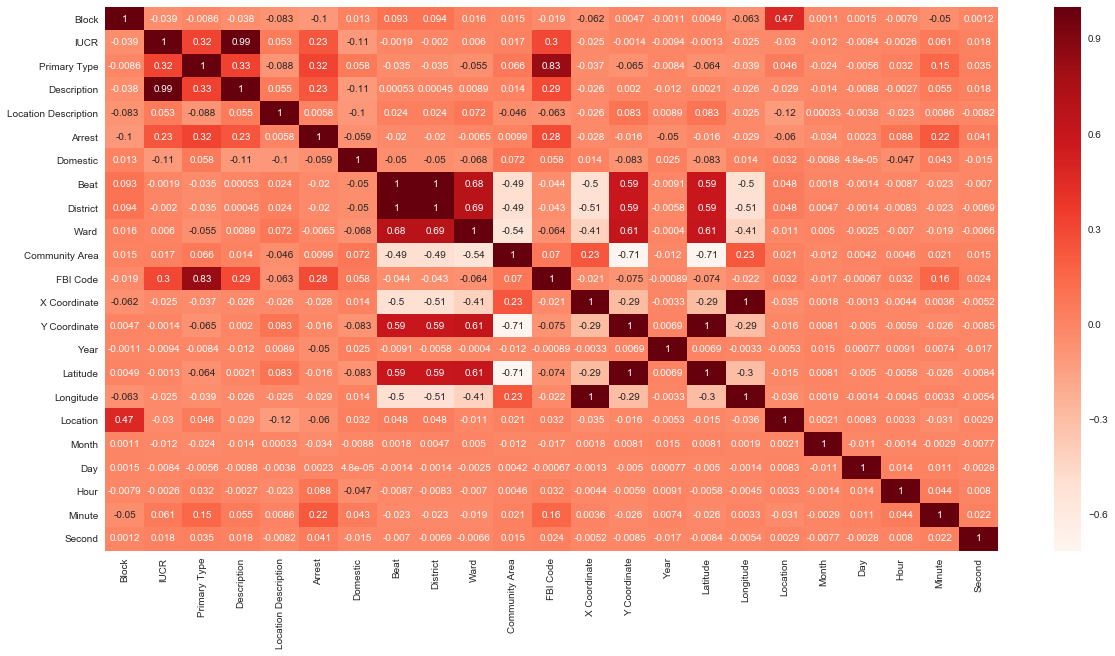

In [16]:
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.319914
Primary Type    1.000000
Description     0.333674
Arrest          0.317617
FBI Code        0.825331
Name: Primary Type, dtype: float64

In [18]:
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics

from sklearn import metrics


In [20]:
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [21]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [22]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.99465
Recall      :  0.99465
Precision   :  0.9945916332870424
F1 Score    :  0.99465
Confusion Matrix: 
[[4539    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1158    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  800    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 1278    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0   11   92    0    0    0   21    0    1    0    0    2
     0    0    4    0    3    0]
 [   0    0    0    0    0  517    0    0    2    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3628    0   11    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0   11    0    0  959    0    0    0    0    0    0
     0    0    0    0    0 

In [1]:
from yellowbrick.classifier import ClassificationReport

================= Classification Report =================

                                  precision    recall  f1-score   support

                           THEFT       1.00      1.00      1.00      4539
                        BURGLARY       1.00      1.00      1.00      1158
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       800
                         ASSAULT       0.99      1.00      1.00      1278
                          OTHERS       0.89      0.69      0.78       134
               CRIMINAL TRESPASS       1.00      1.00      1.00       519
                         BATTERY       1.00      1.00      1.00      3639
              DECEPTIVE PRACTICE       1.00      0.99      0.99       970
                   OTHER OFFENSE       0.96      1.00      0.98      1178
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2106
                       NARCOTICS       1.00      1.00      1.00      1891
      OFFENSE INVOLVING CHILDREN       0.97      0.9

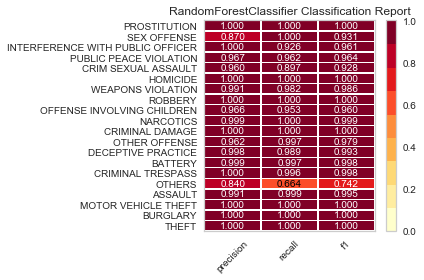

In [23]:
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()       

In [24]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

In [25]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.93795
Recall      :  0.93795
Precision   :  0.9463440478159857
F1 Score    :  0.93795
Confusion Matrix: 
[[4539    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1158    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  799    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 1278    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  100   11    0    0    6    0    0    8    4    2
     0    0    0    0    3    0]
 [   0    0    0    0    0  111    0    0  406    0    0    2    0    0
     0    0    0    0    0    0]
 [   0    0    0    1    0    0 3520  101    0    0   15    2    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    7    0   37  830    0    0    0   14   36   42
     0    0    0    0    0

================= Classification Report =================

                                  precision    recall  f1-score   support

                           THEFT       1.00      1.00      1.00      4539
                        BURGLARY       1.00      1.00      1.00      1158
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       800
                         ASSAULT       1.00      1.00      1.00      1278
                          OTHERS       0.58      0.75      0.65       134
               CRIMINAL TRESPASS       0.90      0.21      0.35       519
                         BATTERY       0.97      0.97      0.97      3639
              DECEPTIVE PRACTICE       0.88      0.86      0.87       970
                   OTHER OFFENSE       0.66      0.98      0.79      1178
                 CRIMINAL DAMAGE       1.00      0.92      0.96      2106
                       NARCOTICS       0.94      0.96      0.95      1891
      OFFENSE INVOLVING CHILDREN       0.43      0.3

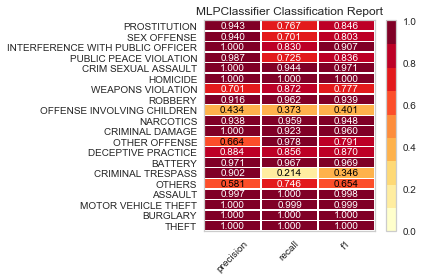

In [27]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()       

In [28]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [29]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99935
Recall      :  0.99935
Precision   :  0.9993500806575281
F1 Score    :  0.99935
Confusion Matrix: 
[[4539    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1158    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  800    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 1277    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  130    0    0    0    2    0    0    0    0    0
     0    0    0    2    0    0]
 [   0    0    0    0    0  519    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3638    0    0    0    0    0    0    0
     0    0    0    0    1    0]
 [   0    0    0    0    0    1    0  969    0    0    0    0    0    0
     0    0    0    0

================= Classification Report =================

                                  precision    recall  f1-score   support

                           THEFT       1.00      1.00      1.00      4539
                        BURGLARY       1.00      1.00      1.00      1158
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       800
                         ASSAULT       1.00      1.00      1.00      1278
                          OTHERS       0.98      0.97      0.98       134
               CRIMINAL TRESPASS       1.00      1.00      1.00       519
                         BATTERY       1.00      1.00      1.00      3639
              DECEPTIVE PRACTICE       1.00      1.00      1.00       970
                   OTHER OFFENSE       1.00      1.00      1.00      1178
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2106
                       NARCOTICS       1.00      1.00      1.00      1891
      OFFENSE INVOLVING CHILDREN       1.00      1.0

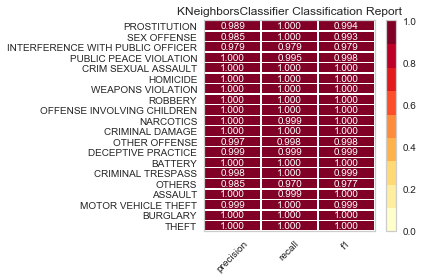

In [30]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof() 